In [79]:
library(tidyverse)
library(gclus)
library(GGally)
library(ggplot2)
library(plotly)
library(tidyverse)
library(RPostgreSQL)
library(forecast)
library(gcookbook)
library(gridExtra)
library(lubridate)
library(vcd)
install.packages('funModeling',lib='.', verbose=TRUE)
library(funModeling,lib.loc='.')

install.packages('ggcorrplot',lib='.', verbose=TRUE)
library(ggcorrplot,lib.loc='.')

options(repr.plot.width=5, repr.plot.height=3)

system (cmd0): /usr/lib/R/bin/R CMD INSTALL
foundpkgs: funModeling, /tmp/RtmpI0m5FP/downloaded_packages/funModeling_1.9.3.tar.gz
files: /tmp/RtmpI0m5FP/downloaded_packages/funModeling_1.9.3.tar.gz
1): succeeded '/usr/lib/R/bin/R CMD INSTALL -l '/srv/home/csun0014' /tmp/RtmpI0m5FP/downloaded_packages/funModeling_1.9.3.tar.gz'
system (cmd0): /usr/lib/R/bin/R CMD INSTALL
foundpkgs: ggcorrplot, /tmp/RtmpI0m5FP/downloaded_packages/ggcorrplot_0.1.3.tar.gz
files: /tmp/RtmpI0m5FP/downloaded_packages/ggcorrplot_0.1.3.tar.gz
1): succeeded '/usr/lib/R/bin/R CMD INSTALL -l '/srv/home/csun0014' /tmp/RtmpI0m5FP/downloaded_packages/ggcorrplot_0.1.3.tar.gz'


In [80]:
library(zoo)
library(lubridate)
library (quantmod)
library(xts)
library(fpp2)

In [83]:
ls()

[1] "df1"       "df_AU"     "Df_AU"     "df_China"  "df_IN"     "df_IT"    
[7] "df_Taiwan" "df_US"     "j"

In [84]:
df1 <- read.table(file = "03252020_df_confirmed", 
                     header = TRUE, 
                     sep = ",")

Warning message in file(file, "rt"):
“cannot open file '03252020_df_confirmed': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection


In [89]:
head(df1)

ObservationDate,Country,Confirmed
01/22/2020,Mainland China,1
01/22/2020,Mainland China,14
01/22/2020,Mainland China,6
01/22/2020,Mainland China,1
01/22/2020,Mainland China,0
01/22/2020,Mainland China,26


In [12]:
unique(df1$Country)

[1] Mainland China                   Hong Kong                       
  [3] Macau                            Taiwan                          
  [5] US                               Japan                           
  [7] Thailand                         South Korea                     
  [9] Singapore                        Philippines                     
 [11] Malaysia                         Vietnam                         
 [13] Australia                        Mexico                          
 [15] Brazil                           Colombia                        
 [17] France                           Nepal                           
 [19] Canada                           Cambodia                        
 [21] Sri Lanka                        Ivory Coast                     
 [23] Germany                          Finland                         
 [25] United Arab Emirates             India                           
 [27] Italy                            UK                              
 [29] Russia                           Sweden                          
 [31] Spain                            Belgium                         
 [33] Others                           Egypt                           
 [35] Iran                             Israel                          
 [37] Lebanon                          Iraq                            
 [39] Oman                             Afghanistan                     
 [41] Bahrain                          Kuwait                          
 [43] Austria                          Algeria                         
 [45] Croatia                          Switzerland                     
 [47] Pakistan                         Georgia                         
 [49] Greece                           North Macedonia                 
 [51] Norway                           Romania                         
 [53] Denmark                          Estonia                         
 [55] Netherlands                      San Marino                      
 [57]  Azerbaijan                      Belarus                         
 [59] Iceland                          Lithuania                       
 [61] New Zealand                      Nigeria                         
 [63] North Ireland                    Ireland                         
 [65] Luxembourg                       Monaco                          
 [67] Qatar                            Ecuador                         
 [69] Azerbaijan                       Czech Republic                  
 [71] Armenia                          Dominican Republic              
 [73] Indonesia                        Portugal                        
 [75] Andorra                          Latvia                          
 [77] Morocco                          Saudi Arabia                    
 [79] Senegal                          Argentina                       
 [81] Chile                            Jordan                          
 [83] Ukraine                          Saint Barthelemy                
 [85] Hungary                          Faroe Islands                   
 [87] Gibraltar                        Liechtenstein                   
 [89] Poland                           Tunisia                         
 [91] Palestine                        Bosnia and Herzegovina          
 [93] Slovenia                         South Africa                    
 [95] Bhutan                           Cameroon                        
 [97] Costa Rica                       Peru                            
 [99] Serbia                           Slovakia                        
[101] Togo                             Vatican City                    
[103] French Guiana                    Malta                           
[105] Martinique                       Republic of Ireland             
[107] Bulgaria                         Maldives                        
[109] Bangladesh                       Moldova                         
[111] Paraguay                         Alb

# India

In [46]:
 df_IN <- df1 %>% filter(Country %in% c('India'))

In [90]:
 head(df_IN)

ObservationDate,Country,Confirmed
01/30/2020,India,1
01/31/2020,India,1
02/01/2020,India,1
02/02/2020,India,2
02/03/2020,India,3
02/04/2020,India,3


# China 

In [48]:
 df_China <- df1 %>% filter(Country %in% c('Mainland China'))

In [91]:
 head(df_China)

ObservationDate,Country,Confirmed
01/22/2020,Mainland China,1
01/22/2020,Mainland China,14
01/22/2020,Mainland China,6
01/22/2020,Mainland China,1
01/22/2020,Mainland China,0
01/22/2020,Mainland China,26


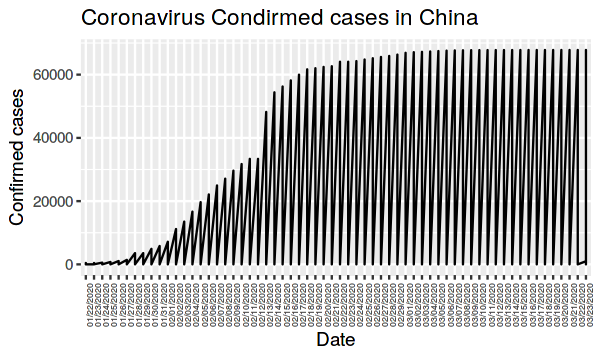

In [101]:
j <- ggplot(df_China, aes(ObservationDate, Confirmed, group = 1))
j + geom_line() + 
  labs(x = "Date", y = "Confirmed cases", 
              title = "Coronavirus Condirmed cases in China") + theme(axis.text.x = element_text(angle = 90, size = 5))

# Italy 

In [44]:
 df_IT <- df1 %>% filter(Country %in% c('Italy'))

In [92]:
 head(df_IT)

ObservationDate,Country,Confirmed
01/31/2020,Italy,2
02/01/2020,Italy,2
02/02/2020,Italy,2
02/03/2020,Italy,2
02/04/2020,Italy,2
02/05/2020,Italy,2


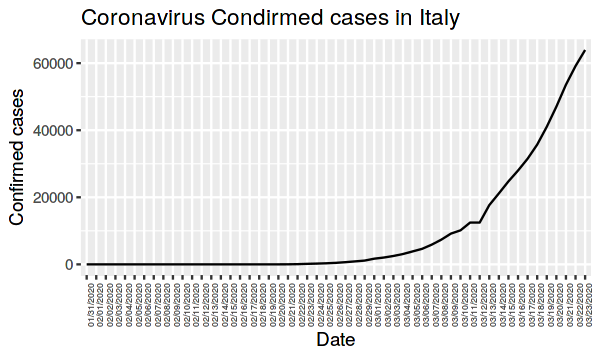

In [100]:
j <- ggplot(df_IT, aes(ObservationDate, Confirmed, group = 1))
j + geom_line() + 
  labs(x = "Date", y = "Confirmed cases", 
              title = 'Coronavirus Condirmed cases in Italy') + theme(axis.text.x = element_text(angle = 90, size = 5))

# Taiwan

In [51]:
 df_Taiwan <- df1 %>% filter(Country %in% c('Taiwan'))

In [93]:
 head(df_Taiwan)

ObservationDate,Country,Confirmed
01/22/2020,Taiwan,1
01/23/2020,Taiwan,1
01/24/2020,Taiwan,3
01/25/2020,Taiwan,3
01/26/2020,Taiwan,4
01/27/2020,Taiwan,5


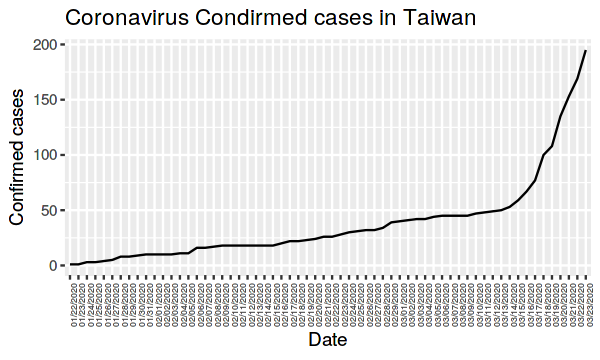

In [88]:
j <- ggplot(df_Taiwan, aes(ObservationDate, Confirmed, group = 1))
j + geom_line() + 
  labs(x = "Date", y = "Confirmed cases", 
              title = "Coronavirus Condirmed cases in Taiwan") + theme(axis.text.x = element_text(angle = 90, size = 5))

# US

In [52]:
 df_US <- df1 %>% filter(Country %in% c('US'))

In [95]:
head(df_US)

ObservationDate,Country,Confirmed
01/22/2020,US,1
01/23/2020,US,1
01/24/2020,US,1
01/24/2020,US,1
01/25/2020,US,1
01/25/2020,US,1


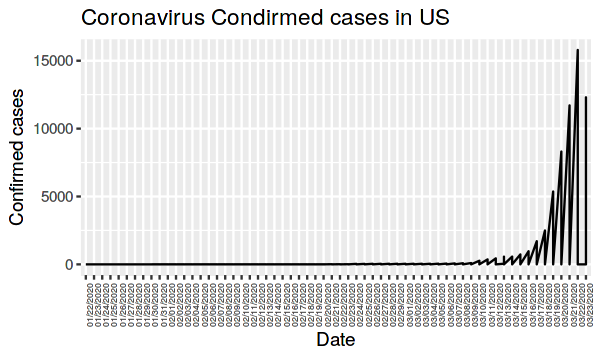

In [98]:
j <- ggplot(df_US, aes(ObservationDate, Confirmed, group = 1))
j + geom_line() + 
  labs(x = "Date", y = "Confirmed cases", 
              title = "Coronavirus Condirmed cases in US") + theme(axis.text.x = element_text(angle = 90, size = 5))

# AU 

In [33]:
# filter the countries I want 

 df_AU <- df1 %>% filter(Country %in% c('Australia'))

In [34]:
nrow(df_AU)

[1] 331

In [35]:
str(df_AU)

'data.frame':	331 obs. of  3 variables:
 $ ObservationDate: Factor w/ 62 levels "01/22/2020","01/23/2020",..: 2 4 5 6 6 7 7 8 8 9 ...
 $ Country        : Factor w/ 203 levels "Afghanistan",..: 10 10 10 10 10 10 10 10 10 10 ...
 $ Confirmed      : num  0 4 4 4 1 4 1 4 1 4 ...


In [37]:
head(df_AU)

ObservationDate,Country,Confirmed
01/23/2020,Australia,0
01/25/2020,Australia,4
01/26/2020,Australia,4
01/27/2020,Australia,4
01/27/2020,Australia,1
01/28/2020,Australia,4


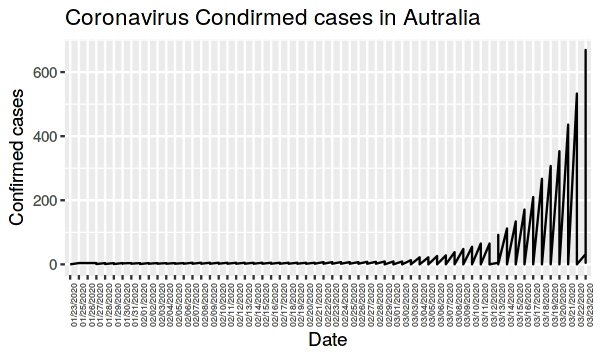

In [99]:
j <- ggplot(df_AU, aes(ObservationDate, Confirmed, group = 1))
j + geom_line() + 
  labs(x = "Date", y = "Confirmed cases", 
              title = "Coronavirus Condirmed cases in Autralia") + theme(axis.text.x = element_text(angle = 90, size = 5))

In [105]:
# install.package('forcast')
install.packages('forecast',lib='.', verbose=TRUE)
library(forecast,lib.loc='.')

system (cmd0): /usr/lib/R/bin/R CMD INSTALL
foundpkgs: forecast, /tmp/RtmpI0m5FP/downloaded_packages/forecast_8.11.tar.gz
files: /tmp/RtmpI0m5FP/downloaded_packages/forecast_8.11.tar.gz
1): succeeded '/usr/lib/R/bin/R CMD INSTALL -l '/srv/home/csun0014' /tmp/RtmpI0m5FP/downloaded_packages/forecast_8.11.tar.gz'


In [108]:
library(forecast)